In [1]:
import sys
# sys.path.append('C://Users/Wian/Documents/BEng(Hons)/CBT/Skogestad-Python')
sys.path.append('/home/wian/Documents/BEng_Hons/Skogestad-Python/')

In [40]:
import utils
import numpy
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()
%matplotlib inline

In [41]:
G11 = utils.tf([4.29], [6.7, 1])#, deadtime = 2.6)
G12 = utils.tf([-2.38], [8.64, 1])#, deadtime = 3.5)
G13 = utils.tf([-2.156], [9.06, 1])#, deadtime = 1)
G21 = utils.tf([7.215], [3.25, 1])#, deadtime = 6.5)
G22 = utils.tf([-9.218], [5.0, 1])#, deadtime = 3)
G23 = utils.tf([-2.156], [9.06, 1])#, deadtime = 1)
G31 = utils.tf([-0.5635], [8.15, 1])#, deadtime = 9.2)
G32 = utils.tf([0.451143], [10.9, 1])#, deadtime = 9.4)
G33 = utils.tf([1.1*10.1, 1.1*0.87], [3.89*18.8, 18.8+3.89, 1])#, deadtime = 1)

In [42]:
G = utils.mimotf([[G11, G12, G13], [G21, G22, G23], [G31, G32, G33]])

In [43]:
Poles, Zeros, _ = utils.poles_and_zeros_of_square_tf_matrix(G)

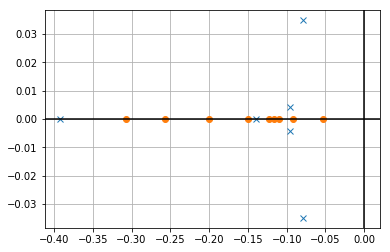

In [44]:
plt.plot(numpy.real(Poles), numpy.imag(Poles), 'x')
plt.plot(numpy.real(Zeros), numpy.imag(Zeros), 'o')
plt.grid()
plt.axhline([0], color = 'k')
plt.axvline([0], color = 'k')

In [45]:
utils.RGA(G(0))

array([[ 2.11123578, -0.84907281, -0.26216297],
       [-0.59035419,  1.67068873, -0.08033454],
       [-0.52088159,  0.17838408,  1.34249751]])

In [100]:
# A,B,C,D = utils.tf2ss(G)
Loop = utils.mimotf(G[0,0]) * utils.mimotf((numpy.eye(3) + G)[0,0].inverse())

Loop = sympy.simplify(utils.mimotf2sym(Loop)[0])
Loop = utils.sym2mimotf(Loop)
utils.tf2ss(Loop)

23 36


AssertionError: 

In [47]:
import utilsplot
import control
import slycot

In [48]:
utilsplot.step(G)

TypeError: iteration over a 0-d array

<Figure size 432x288 with 0 Axes>

In [ ]:
t = numpy.linspace(0, 120, 1000)
Gss = control.ss2tf(A,B,C,D)
t, y = control.step_response(Gss, t)
y

In [ ]:
plt.plot(t,y[0])
plt.plot(t,y[1])
plt.plot(t,y[2])